# DO NOT TOUCH!

In [1]:
from methods.intrinsic_dimension_estimators.pid import *
from models.point_cloud import *
from methods.tardis import *
from methods.euclidicity import *

In [2]:
neighborhood_size = 100
maximum_dimension = 3
n_steps = 5

In [3]:
n = 10000
intrinsic_dimension = 3
r = 1
seed = 1
spatial_dimension = 3

In [4]:
points = sample_from_ball(n, intrinsic_dimension, r, seed, spatial_dimension)

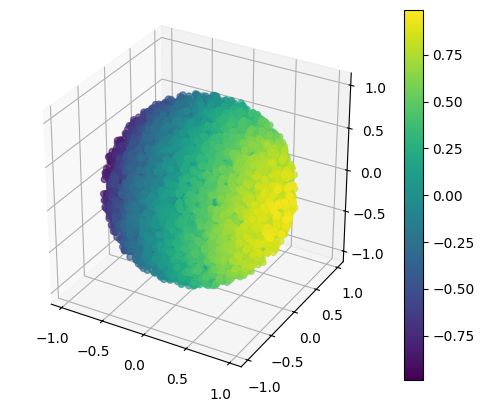

In [5]:
plot_3d_scatterplot(points, points[:, 0])

In [6]:
point_cloud = PointCloud()
point_cloud.random_constructor(points, 1000)

In [7]:
execute(point_cloud, neighborhood_size, maximum_dimension, n_steps)

In [8]:
data = point_cloud.get_query_points()

In [9]:
c = [query.intrinsic_dimension for query in point_cloud.queries]

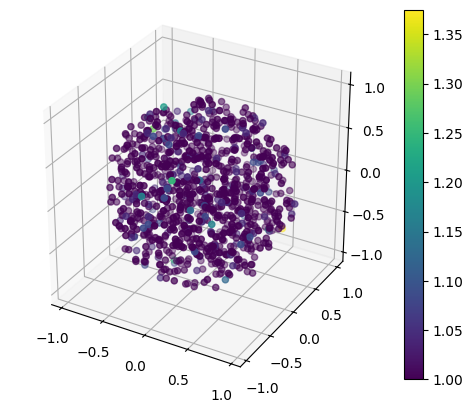

In [10]:
plot_3d_scatterplot(data, c)

In [11]:
c = [query.euclidicity for query in point_cloud.queries]

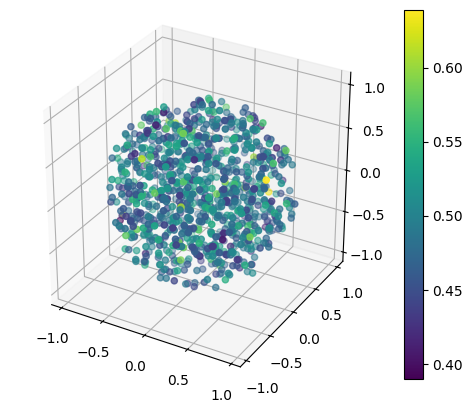

In [12]:
plot_3d_scatterplot(data, c)

In [13]:
id_tardis = [query.intrinsic_dimension for query in point_cloud.queries]

In [14]:
eu_tardis = [query.euclidicity for query in point_cloud.queries]

In [15]:
for query in point_cloud.queries:
    query.intrinsic_dimension = 0
    query.euclidicity = 0

In [16]:
deleted = [(query.intrinsic_dimension, query.euclidicity) for query in point_cloud.queries]

In [17]:
np.unique(deleted)

array([0])

In [18]:
estimate(point_cloud, neighborhood_size, maximum_dimension, n_steps=n_steps)

In [19]:
data = point_cloud.get_query_points()

In [20]:
c = [query.intrinsic_dimension for query in point_cloud.queries]

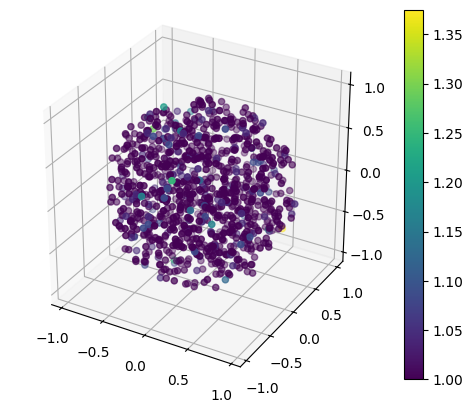

In [21]:
plot_3d_scatterplot(data, c)

In [22]:
id_mine = [query.intrinsic_dimension for query in point_cloud.queries]

In [23]:
np.array_equal(id_tardis, id_mine)

True

In [24]:
np.unique(id_tardis, return_counts=True)

(array([1.        , 1.04166667, 1.08333333, 1.125     , 1.16666667,
        1.20833333, 1.25      , 1.29166667, 1.375     ]),
 array([854,  92,  37,   5,   6,   2,   2,   1,   1], dtype=int64))

In [25]:
np.unique(id_mine, return_counts=True)

(array([1.        , 1.04166667, 1.08333333, 1.125     , 1.16666667,
        1.20833333, 1.25      , 1.29166667, 1.375     ]),
 array([854,  92,  37,   5,   6,   2,   2,   1,   1], dtype=int64))

In [26]:
calculate(point_cloud, neighborhood_size, n_steps=n_steps)

In [27]:
data = point_cloud.get_query_points()

In [28]:
c = [query.euclidicity for query in point_cloud.queries]

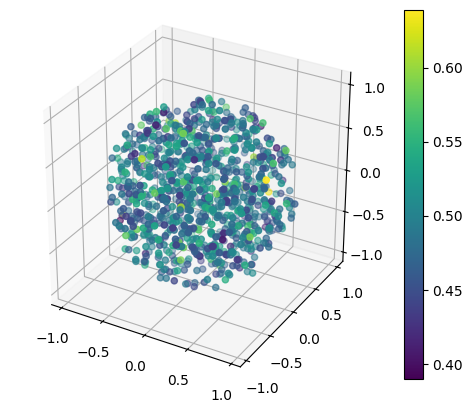

In [29]:
plot_3d_scatterplot(data, c)

In [30]:
eu_mine = [query.euclidicity for query in point_cloud.queries]

In [31]:
np.array_equal(eu_tardis, eu_mine)

False

In [32]:
count = 0
for i in range(len(eu_tardis)):
    if eu_tardis[i] != eu_mine[i]:
        str_tardis = str(eu_tardis[i])
        str_mine = str(eu_mine[i])
        max_length = max(len(str_tardis), len(str_mine))
        str_tardis += (max_length - len(str_tardis)) * '0'
        str_mine += (max_length - len(str_mine)) * '0'
        for j in range(len(str_tardis)):
            if str_tardis[j] != str_mine[j]:
                count += 1
                print(i, str_tardis, str_mine, str_tardis[j:], str_mine[j:])
                break
print(count)

1 0.44885924582680060 0.44885924582680065 0 5
3 0.49017566194136930 0.49017566194136936 0 6
6 0.49951854596535360 0.49951854596535367 0 7
7 0.48396244707206880 0.48396244707206887 0 7
8 0.47988885330657160 0.47988885330657166 0 6
9 0.44600902994473770 0.44600902994473773 0 3
11 0.47618021195133520 0.47618021195133525 0 5
13 0.45965876057744020 0.45965876057744026 0 6
17 0.49987905534605180 0.49987905534605187 0 7
19 0.44042558409273620 0.44042558409273624 0 4
20 0.45771995062629380 0.45771995062629384 0 4
26 0.48455919325351710 0.48455919325351715 0 5
28 0.47237248967091240 0.47237248967091244 0 4
31 0.46079779230058190 0.46079779230058193 0 3
33 0.47071019435922300 0.47071019435922307 0 7
35 0.48593059927225110 0.48593059927225113 0 3
38 0.42270159100492790 0.42270159100492793 0 3
42 0.47133062159021690 0.47133062159021694 0 4
43 0.48222567824025940 0.48222567824025947 0 7
52 0.46579718465606370 0.46579718465606373 0 3
57 0.47747689485549920 0.47747689485549927 0 7
60 0.43371274570624

In [33]:
# 614
(pow(10, 13) * 0.46396136097609990) // 1

4639613609760.0

In [34]:
(pow(10, 13) * 0.46396136097609997) // 1

4639613609761.0

In [35]:
digits = 12

In [36]:
eu_tardis_trimmed = eu_tardis.copy()
for i in range(len(eu_tardis_trimmed)):
    eu_tardis_trimmed[i] = (pow(10, digits) * eu_tardis_trimmed[i] // 1) / pow(10, digits)

In [37]:
eu_mine_trimmed = eu_mine.copy()
for i in range(len(eu_mine_trimmed)):
    eu_mine_trimmed[i] = (pow(10, digits) * eu_mine_trimmed[i] // 1) / pow(10, digits)

In [38]:
np.array_equal(eu_tardis_trimmed, eu_mine_trimmed)

True

In [39]:
eu_tardis[:5]

[0.5116039849817753,
 0.4488592458268006,
 0.4850138301650683,
 0.4901756619413693,
 0.5236549135297537]

In [40]:
eu_mine[:5]

[0.5116039849817753,
 0.44885924582680065,
 0.4850138301650683,
 0.49017566194136936,
 0.5236549135297537]

In [41]:
eu_tardis_trimmed[:5]

[0.511603984981,
 0.448859245826,
 0.485013830165,
 0.490175661941,
 0.523654913529]

In [42]:
eu_mine_trimmed[:5]

[0.511603984981,
 0.448859245826,
 0.485013830165,
 0.490175661941,
 0.523654913529]